<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M4Sesi%C3%B3n8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Módulo 4**

**Sesión 8**
Introducción a Machine Learning: Clasificación No Supervisada y Supervisada

- Conocer la definición de Machine Learning, qué es y cómo se utiliza
- Aplicar un algoritmo de K-Medias
- Interpretar los resultados de K-Medias
- Aplicar un algoritmo de Regresión Logística
- Evaluar un modelo de Regresión Logística utilizando matriz de confusión y curva ROC / AUC

**Ejemplo 1**
K-Medias

- Aprender a aplicar un algoritmo de K-Medias

Clasificación no supervisada

In [7]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/crimenes_locacion.csv")
df.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


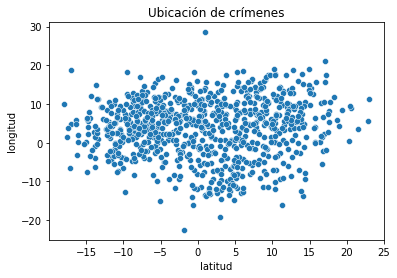

In [18]:
#Graficar
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title("Ubicación de crímenes")
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df['latitud'], y=df['longitud'], ax=ax);

In [4]:
from sklearn.cluster import KMeans

In [33]:
#Calcular los k-means
k_means = KMeans(n_clusters=6, max_iter=10_000)

In [20]:
k_means.fit(df[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
#Lista que contiene la ubicación de los centroides
centers = k_means.cluster_centers_
centers

array([[ 1.26667914,  2.64719521],
       [-9.85740469,  0.42690554],
       [ 4.56650842, -8.83674895],
       [ 7.77799627, 12.93884583],
       [-6.1721586 ,  9.43058413],
       [12.72711956,  4.53877175]])

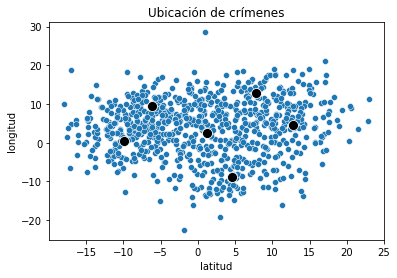

In [35]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title("Ubicación de crímenes")
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df['latitud'], y=df['longitud'], ax=ax);
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');

In [26]:
clasificaciones = k_means.predict(df[['latitud', 'longitud']])

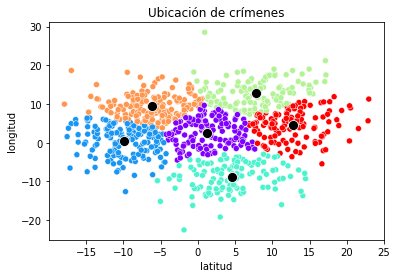

In [30]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title("Ubicación de crímenes")
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df['latitud'], y=df['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');
ax.get_legend().remove()

Reto 1
K-Medias

- Aprender a aplicar un algoritmo de K-Medias

Segmentación por subregiones de los usuarios de un producto.
Conjunto de datos llamado 'distribucion_usuarios.csv'.

El dataset también contiene el código único de cada usuario y 4 columnas llamadas: 'producto_1', 'producto_2', 'producto_3', 'producto_4'. Estas columnas contienen un 1 en caso de que el usuario haya adquirido ese producto, y un 0 en caso de que el producto no haya sido adquirido.

1. Utiliza un scatterplot para visualizar las latitudes y longitudes de tu conjunto de datos.
1. Después utiliza la clase KMeans de scikit-learn para encontrar 7 centroides.
1. Ya que hayas encontrado tus centroides, crea una nueva visualización donde además de tus puntos, grafiques los 7 centros.
1. Ahora, utiliza tu modelo para clasificar tus puntos.
1. Después agrega segmentación por color a tu gráfica para que los puntos se coloreen de acuerdo al grupo al que pertenecen.
1. Ya que tienes tus puntos clasificados, agrega la clasificación al DataFrame original.
1. Ahora, segmenta tu DataFrame por grupo y obtén los siguientes datos:
  - Cantidad total de usuarios por grupo
  - Cantidades totales de producto 1, 2, 3 y 4 por grupo
1. Realiza una gráfica de barras para visualizar la cantidad de usuarios que hay en cada uno de los grupos
1. Finalmente, genera una gráfica de barras apiladas con los totales de productos adquiridos por grupo. Cada segmento de la barra será la cantidad de producto adquirido en un grupo en específico.

In [79]:
usuarios = pd.read_csv("/content/drive/MyDrive/Datasets/distribucion_usuarios-1.csv")
usuarios.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud
0,1,0,0,0,0,14.277305,-5.958917
1,2,0,0,1,0,-9.958963,1.036839
2,3,0,0,1,0,7.859551,1.932572
3,4,1,1,1,1,-8.989976,6.969268
4,5,1,0,0,0,-6.641690,-0.777759


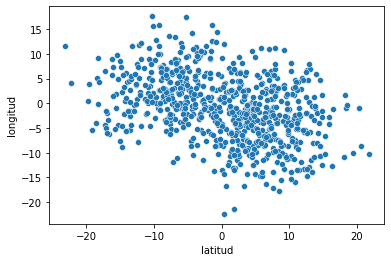

In [82]:
#1. Scatter plot
sns.scatterplot(x=usuarios['latitud'], y=usuarios['longitud']);

In [83]:
#2. K-Means 7 centroides
k_means7 = KMeans(n_clusters=7, max_iter=10_000)

In [85]:
k_means7.fit(usuarios[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
#3. Centroides
centers7 = k_means7.cluster_centers_
centers7

array([[ -5.62963967,  -0.96472713],
       [  5.54499931, -10.78471482],
       [  3.08956321,  -2.17736048],
       [ -6.35412715,   8.36004507],
       [-14.50218331,   0.85843488],
       [ 12.71897581,  -4.50290922],
       [  7.24032885,   4.68397407]])

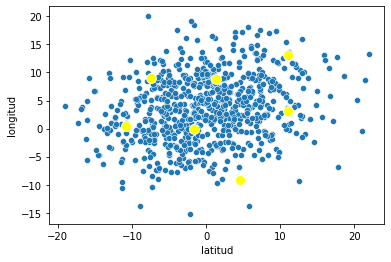

In [56]:
#4. Gráfica
fig = plt.figure()
ax = fig.add_subplot()

sns.scatterplot(x=usuarios['latitud'], y=usuarios['longitud'])
sns.scatterplot(x=centers7[:,0], y=centers7[:,1], ax=ax, s=100, color='yellow');

In [87]:
#5. Clasificación
clasificaciones7 = k_means.predict(usuarios[['latitud', 'longitud']])

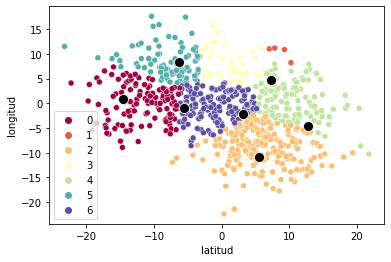

In [88]:
#6. Gráfica
fig = plt.figure()
ax = fig.add_subplot()

sns.scatterplot(x=usuarios['latitud'], y=usuarios['longitud'], ax=ax, hue=clasificaciones7, palette='Spectral');
sns.scatterplot(x=centers7[:,0], y=centers7[:,1], ax=ax, s=100, color='black');

In [89]:
#7. Agregar clasificación a DataFrame
usuarios['clasificacion'] = clasificaciones7
usuarios.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud,clasificacion
0,1,0,0,0,0,14.277305,-5.958917,4
1,2,0,0,1,0,-9.958963,1.036839,0
2,3,0,0,1,0,7.859551,1.932572,4
3,4,1,1,1,1,-8.989976,6.969268,5
4,5,1,0,0,0,-6.641690,-0.777759,0


In [93]:
#8. Segmentar DF:
#a) Cantidad total de usuarios por grupo
usuarios_g1 = usuarios.groupby('clasificacion')['codigo_de_usuario'].count()
usuarios_g1

clasificacion
0    130
1      4
2    202
3     41
4    118
5     93
6    161
Name: codigo_de_usuario, dtype: int64

In [94]:
#8.b)Cantidades totales de producto 1, 2, 3 y 4 por grupo
usuarios_g2 = usuarios.groupby('clasificacion')[['producto_1', 'producto_2', 'producto_3', 'producto_4']].sum()
usuarios_g2

,producto_1,producto_2,producto_3,producto_4
clasificacion,,,,
0,86,13,61,27
1,2,1,1,2
2,128,26,109,34
3,36,0,22,7
4,77,15,60,29
5,71,5,55,16
6,110,17,76,30


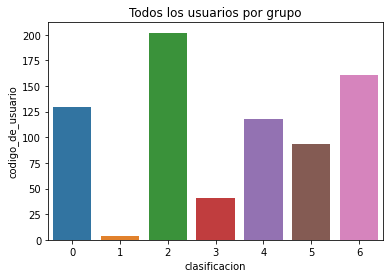

In [97]:
#9. Gráfica de barras
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Todos los usuarios por grupo')
ax.set_xlabel('Grupos')
ax.set_ylabel('Número de usuarios')

sns.barplot(x=usuarios_g1.index, y=usuarios_g1, ax=ax);

In [ ]:
#10. Gráfica de barras apiladas


**Ejemplo 2**

Regresión Logística

- Aprender a aplicar un algoritmo de Regresión Logística

Clasificación supervisada, binaria.

In [64]:
#Resultados cancer de mama
df = pd.read_csv('/content/drive/MyDrive/Datasets/breast_cancer_wisconsin.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [67]:
#Limpiar dtaset
df = df.drop(columns=['Unnamed: 32'])

In [68]:
#Clasificación binaria Maligno, Benigno
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [69]:
#Convertir a 0 y 1

df['diagnosis'] = df['diagnosis'].apply( lambda x:1 if x=='M' else 0)

In [70]:
#Definición dependiente e independientes
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [74]:
#Separar, en este caso 30% de prueba y 70% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [75]:
log_reg = LogisticRegression(max_iter=10_000)

In [76]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [78]:
#Cercanía al resultado
log_reg.score(X_test, y_test)

0.935672514619883

**Reto 2**

Regresión logística

- Aprender a aplicar un algoritmo de Regresión Logística

Dataset 'diabetes-clean.csv'.
Variable outcome, que indica si la paciente fue diagnosticada con diabetes o no. El 1 es un diagnóstico positivo (hay diabetes), mientras que el 0 es un diagnóstico negativo (no hay diabetes).

1. Realiza un pairplot (gráfica de pares) de tu conjunto de datos, donde cada scatterplot esté segmentado usando la categoría 'outcome'. 1. Esto significa que los puntos en cada gráfica estarán coloreados de acuerdo a si corresponden al outcome 1 o 0. Puedes encontrar las instrucciones de cómo hacer eso aquí.
1. Con tu gráfica de pares hecha, decide si realizar algo de limpieza en tus datos antes de entrenar el modelo. La limpieza puede consistir en eliminar algunos datos con valores atípicos o remover variables independientes que no creas que estén tan relacionadas con el resultado.
1. Utilizando train_test_split separa tu dataset en entrenamiento y prueba.
1. Entrena un modelo de LogisticRegression usando tu dataset de entrenamiento.
1. Obtén el score de exactitud de tu modelo.
1. Si crees que el score pueda mejorar, regresa al punto 3 y realiza algunos cambios antes de volver a entrenar al modelo.
1. Ya que estés satisfecho con los resultados, comenta tus hallazgos con tus compañeros y la experta.

In [81]:
diabetes = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes-clean.csv", index_col=0)
diabetes.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#1. Pairplot con "outcome"

In [ ]:
#2. Limpieza

In [ ]:
#3. train_test_split

In [ ]:
#4. 

In [ ]:
#5. Score

**Ejemplo 3**

Matriz de confusión

- Aprender a evaluar un modelo de clasificación binaria utilizando una matriz de confusión.

In [99]:
#Para matriz de confusión
from sklearn import  metrics

In [100]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[100,   5],
       [  6,  60]])

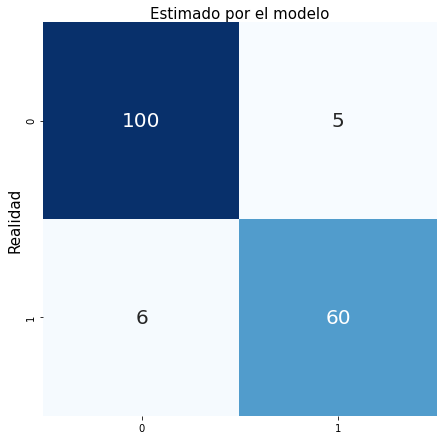

In [103]:
#Matriz
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [105]:
#Clasificaciones verdadero negativo, falso positivo, falso negativo, verdadero negativo
VN, FP, FN, VP = cnf_matrix.ravel()

In [106]:
precision = VP / (VP + FP)
print(precision)

0.9230769230769231


In [107]:
#Clasificación correcta
exactitud = (VP + VN) / (VP + FN + FP + VN)
print(exactitud)

0.935672514619883


In [109]:
#Correctamente positivas
sensibilidad = VP / (VP + FP)
print(sensibilidad)

0.9230769230769231


In [108]:
#Correctamente negativos
especificidad = VN / (VN + FP)
print(especificidad)

0.9523809523809523
